<a href="https://colab.research.google.com/github/gopal2812/mlblr/blob/master/MatplotlibWrappersPandasSeaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# The ``inline`` flag will use the appropriate backend to make figures appear inline in the notebook.  
%matplotlib inline

import pandas as pd
import numpy as np

# `plt` is an alias for the `matplotlib.pyplot` module
import matplotlib.pyplot as plt

# import seaborn library (wrapper of matplotlib)
import seaborn as sns

## Matplotlib Wrappers (Pandas and Seaborn)

Matplotlib is a very popular visualization library, but it definitely has flaws.

1. Matplotlib defaults are not ideal (no grid lines, white background etc).
2. The library is relatively low level. Doing anything complicated takes quite a bit of code. 
3. Lack of integration with pandas data structures (though this is being improved).

In this video, we are going to make a more complicated visualization called a boxplot to show how helpful it is to work with the matplotlib wrappers pandas and seaborn.

### What is a boxplot
![](images/boxplot.png)
A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed. If you want to learn more about how boxplots, you can learn more [here](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51). 

### Load Data

The data used to demonstrate boxplots is the Breast Cancer Wisconsin (Diagnostic) Data Set: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic). The goal of the visualization is to show how the distributions for the column `area_mean` differs for benign versus malignant `diagnosis`. 

In [2]:
# Load wisconsin breast cancer dataset
# either benign or malignant

from google.colab import drive
drive.mount('/content/gdrive')
!ls 
root_path = 'gdrive/My Drive/your_project_folder/'  #change dir to your project folder
cancer_df = pd.read_csv('gdrive/My Drive/datavisual/4 Matplotlib/data/wisconsinBreastCancer.csv')
#cancer_df = pd.read_csv('data/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
gdrive	sample_data


In [3]:
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# Looking at the Distribution of the Dataset in terms of Diagnosis
cancer_df['diagnosis'].value_counts(dropna = False)

B    357
M    212
Name: diagnosis, dtype: int64

### Plotting using Matplotlib

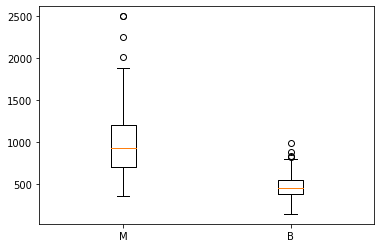

In [5]:
malignant = cancer_df.loc[cancer_df['diagnosis']=='M','area_mean'].values
benign = cancer_df.loc[cancer_df['diagnosis']=='B','area_mean'].values

plt.boxplot([malignant,benign], labels=['M', 'B']);

### Plotting using Pandas
Pandas can be used as a wrapper around Matplotlib. One reason why you might want to plot using Pandas is that it requires less code. 

We are going to create a boxplot to show how much less syntax you need to create the plot with pandas vs pure matplotlib. 

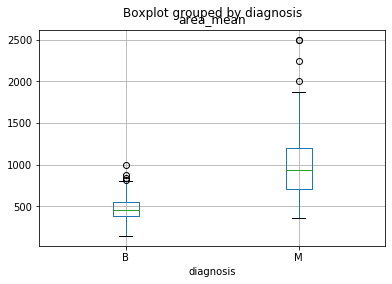

In [6]:
# Getting rid of area_mean 
cancer_df.boxplot(column = 'area_mean', by = 'diagnosis');

Sometimes you will find it useful to use Matplotlib syntax to adjust the final plot output. The code below removes the suptitle and title using pure matplotlib syntax. 

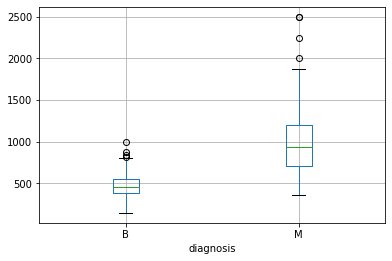

In [7]:
# Same plot but without the area_mean subtitle and title
cancer_df.boxplot(column = 'area_mean', by = 'diagnosis');
plt.title('');
plt.suptitle('');

### Plotting using Seaborn
Seaborn can be seen as a wrapper on top of Matplotlib. [Seaborn's website](https://seaborn.pydata.org/introduction.html) lists a bunch of advantages of using Seaborn including

* Close integration with pandas data structures
* Dataset oriented API for examining relationships between multiple variables. 
* Specialized support for using categorical variables to show observations or aggregate statistics. 
* Concise control over matplotlib figure styling with several built-in themes. 
* Tools for choosing color palettes that faithfully reveal patterns in your data. 

In [0]:
import seaborn as sns

sns.boxplot(x='diagnosis', y='area_mean', data=cancer_df)

Matplotlib is a very popular data visualization library, but it definitely has its flaws. So in this video, we'll learn about two matplotlib wrappers, pandas and seaborn. Matplotlib defaults are not ideal. There's no gridlines, there's a white background, et cetera. The library is also relatively low level, so doing anything complicated takes quite a bit of code. And third, the lack of integration with pandas data structures is inconvenient, though this is being approved. In this video, we're going to make a more complicated visualization called a boxplot to show how helpful it is to work with the matplotlib wrappers, pandas and seaborn. But first, we have to know what a boxplot is and a boxplot is a standardized way of displaying the distribution of data based on a five-number summary, the "minimum," the first quartile, the median, the third quartile, and the maximum. A boxplot can tell you what're your outliners and what their values are. It can also tell if your data's symmetrical, how tightly your data is grouped, and if and how your data is skewed. If you want to learn more about boxplots, you can learn more here. The data we're going to use to demonstrates boxplots is the Breast Cancer Wisconsin Diagnostic dataset. The goal of the visualization is to show how the distributions for the column, area_mean, differs for benign versus malignant diagnosis. So the first thing you have to do is you have to load our data into a pandas data frame. So here's a relative path and inside the data folder, there's a WisconsinBreastCancer.csv file and we're putting this into a pandas data frame, cancer_df. As we're looking at the first five rows of the dataset, notice how we want to find how the column, area_mean, differs for diagnosis of malignant versus benign. If we're looking at the distribution of the dataset in terms of diagnosis, notice that we have a significant amount of benign and malignant cancer diagnoses. Before we can make a boxplot using matplotlib, we have to isolate our malignant diagnosis and our benign diagnosis. And what the code over here is doing is I have a filter for malignant and I have a filter for benign, and so this and this, they're just pandas series for area_mean for benign diagnosis and malignant. And what the values attribute does is it just turns this pandas series into a numpy array. And then from here, you do plt.boxplot. You have one of your numpy arrays, you have your other, and then you have a label for each of your numpy arrays. As you see here, we don't have the prettiest boxplot. But it's pretty clear there's a significant difference between malignant and benign in terms of area_mean. You can also create a boxplot using pandas. And one reason why you might want to use pandas is that it requires less code. For the code over here, all you have to do is have the name of your data frame, in this case, cancer_df, use the boxplot method, specify you want to look at the area_mean column, and you want to separate it out by diagnosis. As you see in this image, it was less code to create the boxplot. It looks like there's something weird going on over here. And one important point to mention is that sometimes even if you're using pandas as a wrap around matplotlib, oftentimes, you can also incorporate matplotlib syntax to adjust the final plot. And the code below removes the titles using pure matplotlib syntax. You can also make boxplots using the seaborn library and seaborn can be seen a wrapper on top of matplotlib. And seaborn's website lists a bunch of advantages of using seaborn, including close integration with pandas data structures, a dataset-oriented API for examining relationships between multiple variables, specialized support for using categorical variables to show observations or aggregate statistics, concise control over matplotlib figure styling with several built-in themes, and tools for choosing color palettes that faithfully reveal patterns in your data. The first thing you have to do if you want to use seaborn is import seaborn. I'm importing seaborn as sns. And over here, I'm using the boxplot method where I'm passing in the cancer data frame into the panda data and I'm looking at the diagnosis column versus the area_mean column, and I'll press Shift + Enter. And then what you see here is that unlike the plots from before, this is more colorful, but perhaps more importantly, the malignant and the benign boxplots are closer together, so it's easier to make a comparison between the two of them. In this video, I showed you how to use two matplotlib wrappers, pandas, which is normally used for data manipulation, can also be used for data visualization, and seaborn, which makes plotting in matplotlib a lot easier.
